Mir Tahmid

mirtahmid@gmail.com

# Installing Required Library Functions

In [1]:
!pip install skimpy summarytools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 56.0 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
  Attempting uninstall: polars
    Found existing installation: polars 1.9.0
    Uninstalling polars-1.9.0:
      Successfully uninstalled polars-1.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.10.0 requires scipy<1.14,>=1.4.1, but you have scipy 1.14.1 which is incompatible.


# Step 1:  Import Necessary Libraries

In [2]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')

# Data processing and visualization libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Skimpy and summary tools
from skimpy import skim
from summarytools import dfSummary

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# AutoML library
from tpot import TPOTRegressor

# Set a deep coffee color palette for all plots
sns.set_palette("dark:#8B4513")

# Step 2: Load and Glimpse of Dataset

In [3]:
# Load Dataset
iPAGE = pd.read_csv('/kaggle/input/2410-ipage-soildata-cleaned/2410_iPAGE_SoilData_cleaned.csv')
print("Dataset Head:\n", iPAGE.head())
print("\nData Summary with Skimpy:")
skim(iPAGE)

Dataset Head:
         Area  Data Collection Year soil group   Land class knit (surface)  \
0  Mithpukur                  2005      belab  high ground     Clay loam    
1  Mithpukur                  2005      belab  high ground     Clay loam    
2  Mithpukur                  2005      belab  high ground     Clay loam    
3  Mithpukur                  2005      belab  high ground     Clay loam    
4  Mithpukur                  2005      belab  high ground     Clay loam    

    pH  SOC (%)  Nitrogen N (%)  Potassium K (meq/100)  Phosphorus P (ug/g)  \
0  5.0     1.27            0.08                   0.15                 19.6   
1  4.9     1.47            0.09                   0.25                  4.1   
2  4.6     1.07            0.05                   0.09                 13.3   
3  5.2     1.51            0.06                   0.30                 20.2   
4  5.3     1.08            0.11                   0.17                 20.5   

   Sulfur S (ug/g)  Boron B (ug/g)  Zinc Zn (ug

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 618    │ │ float64     │ 8     │                                                          │
│ │ Number of columns │ 13     │ │ string      │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0    ┃ p25    ┃ p50  ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Data Collection Year   │   0 │     0 │    2004 │   7.103 │  1990 │   1997 │ 2005 │   2005 │  2016 │ ▁▂ ▇ ▂ │  │
│ │ pH                     │   0 │     0 │   5.237 │  0.4699 │   4.1 │    4.9 │  5.2 │    5.4 │   7.8 │  ▂▇▃▁  │  │
│ │ SOC (%)                │   0 │     0 │   1.792 │   1.034 │   0.1 │  1.353 │  1.7 │   2.16 │  20.4 │   ▇    │  │
│ │ Nitrogen N (%)         │   0 │     0 │  0.1118 │  0.5073 │     0 │   0.07 │ 0.09 │   0.11 │  12.6 │   ▇    │  │
│ │ Potassium K (meq/100)  │   0 │     0 │  0.2412 │  0.5817 │     0 │   0.11 │ 0.17 │ 0.2875 │  14.2 │   ▇    │  │
│ │ Phosphorus P (ug/g)    │   0 │     0 │   31.14 │   38.08 │     0 │  8.785 │   16 │   37.7 │ 254.7 │   ▇▁   │  │
│ │ Sulfur S (ug/g)        │   0 │     0 │   15.34 │   11.06 │   0.4 │  8.703 │ 12.6 │     19 │    85 │  ▇▅▁   │  │
│ │ Boron B (ug/g)         │   0 │     0 │   0.349 │  0.2582 │     0 │   0.23 │  0.3 │    0.4 │  2.66 │   ▇▁   │  │
│ │ Zinc Zn (ug/g)         │   0 │     0 │   1.039 │  0.9761 │  0.08 │   0.52 │ 0.82 │    1.1 │ 10.58 │   ▇▁   │  │
│ └────────────────────────┴─────┴───────┴─────────┴─────────┴───────┴────────┴──────┴────────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                   ┃ NA       ┃ NA %       ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Area                          │        0 │          0 │                        1.6 │                   963 │  │
│ │ soil group                    │        0 │          0 │                        1.3 │                   804 │  │
│ │ Land class                    │        0 │          0 │                        2.6 │                  1595 │  │
│ │ knit (surface)                │      157 │       25.4 │                          1 │                   634 │  │
│ └───────────────────────────────┴──────────┴────────────┴────────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

# Dataset Summary

In [4]:
print("\nData Summary with dfsummarytools:")
dfSummary(iPAGE)


Data Summary with dfsummarytools:


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Area[object],1. Mithpukur2. Pirgacha 3. Kaunia upazila4. Taraganj Thana5. Gangachara,213 (34.5%)149 (24.1%)99 (16.0%)97 (15.7%)60 (9.7%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACRklEQVR4nO3bQWrbUBiF0V9FhGYiYQxejBfRxXYR2o0x1qAJmaiDYprQSRzLV0I9ZwXP8CHzhG4zTVNBwrelD8D/Q2zEiI2Ypqqeq+pp6YPM7G2appelD8FH7X6//9F13W7pg8xpHMdz0zQ/Bbcubdd1u+Px+NL3/evSh5nD5XL5PgzD7nQ6PVWV2Fakrarq+/71cDj8WvowM3pe+gD8ywWBGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2Ihpq/58lrP0Qeaypd+yNe04judhGHa1oc9yxnE8V9Xb0ufgI5+FE9PYjZLigkDMWv9G/Q1u0CrXVdZR27S6dZV11HatdV21mdcw/OWCQIzYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzErG5dtaazMK9Vrquso7bJZ+HEWFcR44JATOpv1N8imXWVtRRVgXWVtRRXqXXVal6rsBwXBGLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIj5uHrKmspriLrKmspqnwWTpB1FTGJJ5unGlUVGLwYu3D10MGLsQvvJQYvxi5UlZe6BImNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2Ih56LrKsor3Hr6usqziygaBGOsqYu59snlq8Wl3rassp7jFl9dVllPc6t51leUUn+alLjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZivryuspziVnetqyynuIUNAjHWVcS4IBAjNmJ+A1L8Djfy3+MbAAAAAElFTkSuQmCC"">",0(0.0%)
2,Data Collection Year[int64],1. 20052. 20163. 19974. 1990,362 (58.6%)99 (16.0%)97 (15.7%)60 (9.7%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB60lEQVR4nO3bQWrjQBRF0a/GhM5Ewhi8GC+iF9uL0G6MsQadkIl6YAwZxjF6BalzVlCYi4xEvWFd14KEX60PQD/ERsxQVa9V9dL6IJ34WNf1rfUhWtkdDoc/4zjuWx+kB8uyXIZh+NtrcLtxHPen0+ltmqb31of5ya7X6+95nvfn8/mlqvqMrapqmqb34/H4r/VhOvDa+gAteUEgRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmJ2VbfrL60P8tP5jat2y7Jc5nneV+fXXxKWZblU1Ufrc7TiWnhW19fCB1M+UrwgEJP6G+3674ObyLqq91URN5uvq6yKuEutq3xWwQsCOWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmI2n/KZsHEXmfL1PmHjxgaBGFM+YhJPNk81qiqwrrKs4m7TdZVlFZ8l1lWWVVSVj7oEiY0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiNl0XWVZxWebr6ssq7izQSDGuoqYZ59snlp82VPrKsspHvHtdZXlFI96dl1lOcWX+ahLjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjZhvr6ssp3jUU+sqyykeYYNAjHUVMV4QiPkPs1jYuW+7IQUAAAAASUVORK5CYII="">",0(0.0%)
3,soil group[object],1. Gangachara2. Palashbari3. Kaunia4. Alluvial soil of Teesta5. Pirgacha6. Berries7. belab8. the moon9. Sahapur10. Noadda11. other,238 (38.5%)66 (10.7%)63 (10.2%)39 (6.3%)36 (5.8%)32 (5.2%)20 (3.2%)18 (2.9%)16 (2.6%)15 (2.4%)75 (12.1%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEKElEQVR4nO3dQWobWQBF0VIjQmciYQxejBfRi+1FaDfGWINOyEQ96JGRbJVTv64adM4CQgUuX1TxX7I5nU4TFP649QNwP8RGRmxkxEZGbGTERkZsZMRGRmxkNtM0fZ+m6dutHyT063Q6/bj1Q9yj7ePj41+73e7h1g9SOR6Pr5vN5m/B9ba73e7h+fn5x36//3nrh1nb29vbn4fD4eHl5eXbNE1ii22naZr2+/3Pp6enf279MJHvt36Ae+UFgYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyGyn6b97Xrd+kMK9/D3/r7bH4/H1cDg8THdyz+t4PL5O0/Tr1s9xj2wQyGz8k1lURp1sTguuGrKuslhijsXrKosl5hq1rrqLN1mW8VGXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzOLBixEJcw0ZvBiRMIdr4WQMXsiMONmcasyyePBi7MJciwYvxi58xYjBi7ELs/ioS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERmbR4MXYha9YPHgxdmEu18LJGLyQ8YJA5is/o34uWWT2usqKiqVmrausqBjhK+sqKyoW8YJARmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGZta6yoqKEWavq6yoWMq1cDLWVWTmnmxONRabNXgxdmGEq4MXYxdGmTt4MXZhMR91yYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFwdvBi7MMqswYuxCyO4Fk7G4IXMnJPNqcYQVwcvxi6M8ungxdiFkeYMXoxdGMJHXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI/PpusqyipGurqssqxjFBoGMdRWZj042pxnDXVxXWVSxhrN1lUUVa/loXWVRxXA+6pIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZE5G7wYubCWi4MXIxfW4Fo4GYMXMk42MgYvZAxeyBi8kPFRl4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzKuhZMxeCHjBYHMpZ9RP6Gs4mxdZVnFWt6tqyyrWNOldZVlFavwgkBGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbm3brKsoo1na2rLKtYi2vhZKyryDjZyBi8kDF4IWPwQsZHXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsi4Fk7G4IXMR/9R2u9yKvKhs8HLEsYyfObd4GXJH2QswzWXBi9LGMvwI

# Step 3: Define Input (X) and Target (Y) Columns

Define the columns to be used as input features (X) and target variables (Y).

In [5]:
X = ['Area', 'soil group', 'Land class', 'knit (surface)', 'pH',
     'Nitrogen N (%)', 'Potassium K (meq/100)', 'Phosphorus P (ug/g)',
     'Sulfur S (ug/g)']
Y = ['SOC (%)', 'Boron B (ug/g)', 'Zinc Zn (ug/g)']

# Step 4: Preprocess the Data

Encode categorical columns in X so they can be used in model training.

In [6]:
label_encoders = {}
categorical_cols = ['Area', 'soil group', 'Land class', 'knit (surface)']

for col in categorical_cols:
    le = LabelEncoder()
    iPAGE[col] = le.fit_transform(iPAGE[col])
    label_encoders[col] = le

# Define the target variables.

In [7]:
y_SOC = iPAGE['SOC (%)']
y_B = iPAGE['Boron B (ug/g)']
y_Zn = iPAGE['Zinc Zn (ug/g)']

# Step 5: Exploratory Data Analysis (EDA)

Perform an initial check for missing values and visualize the distributions of the target variables.


Missing values per column:
Area                     0
Data Collection Year     0
soil group               0
Land class               0
knit (surface)           0
pH                       0
SOC (%)                  0
Nitrogen N (%)           0
Potassium K (meq/100)    0
Phosphorus P (ug/g)      0
Sulfur S (ug/g)          0
Boron B (ug/g)           0
Zinc Zn (ug/g)           0
dtype: int64


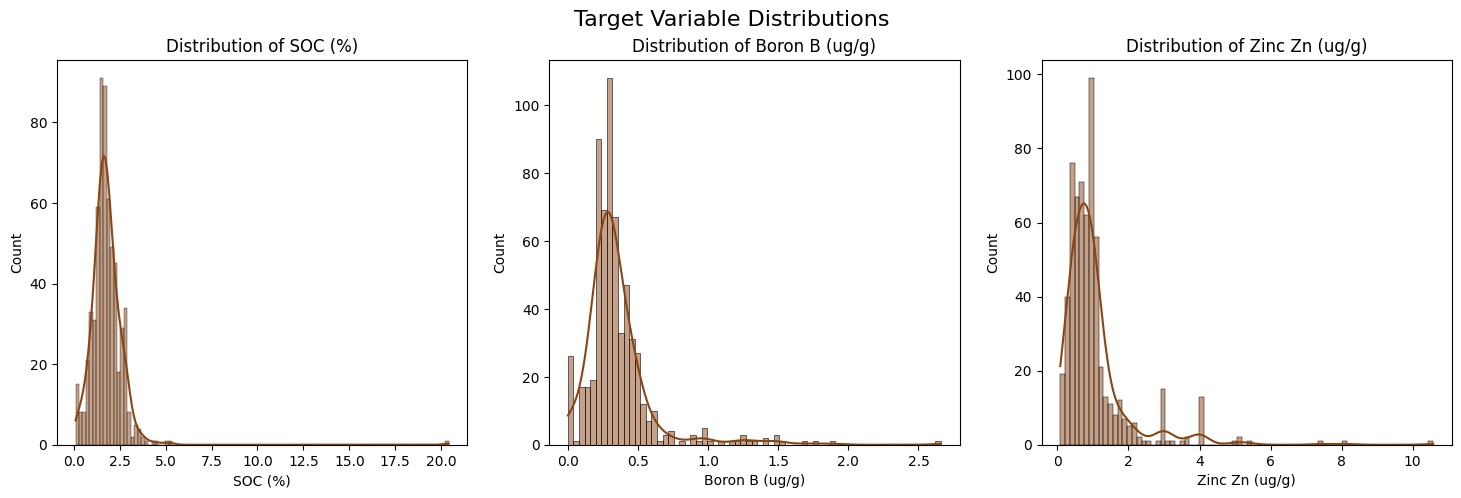

In [8]:
# Check for missing values
print("\nMissing values per column:")
print(iPAGE.isnull().sum())

# Distribution plots for target variables
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.histplot(y_SOC, kde=True, color="#8B4513")
plt.title("Distribution of SOC (%)")

plt.subplot(1, 3, 2)
sns.histplot(y_B, kde=True, color="#8B4513")
plt.title("Distribution of Boron B (ug/g)")

plt.subplot(1, 3, 3)
sns.histplot(y_Zn, kde=True, color="#8B4513")
plt.title("Distribution of Zinc Zn (ug/g)")

plt.suptitle("Target Variable Distributions", fontsize=16)
plt.show()

# Step 6: Correlation Analysis

Create a correlation matrix to analyze relationships between input features and target variables.

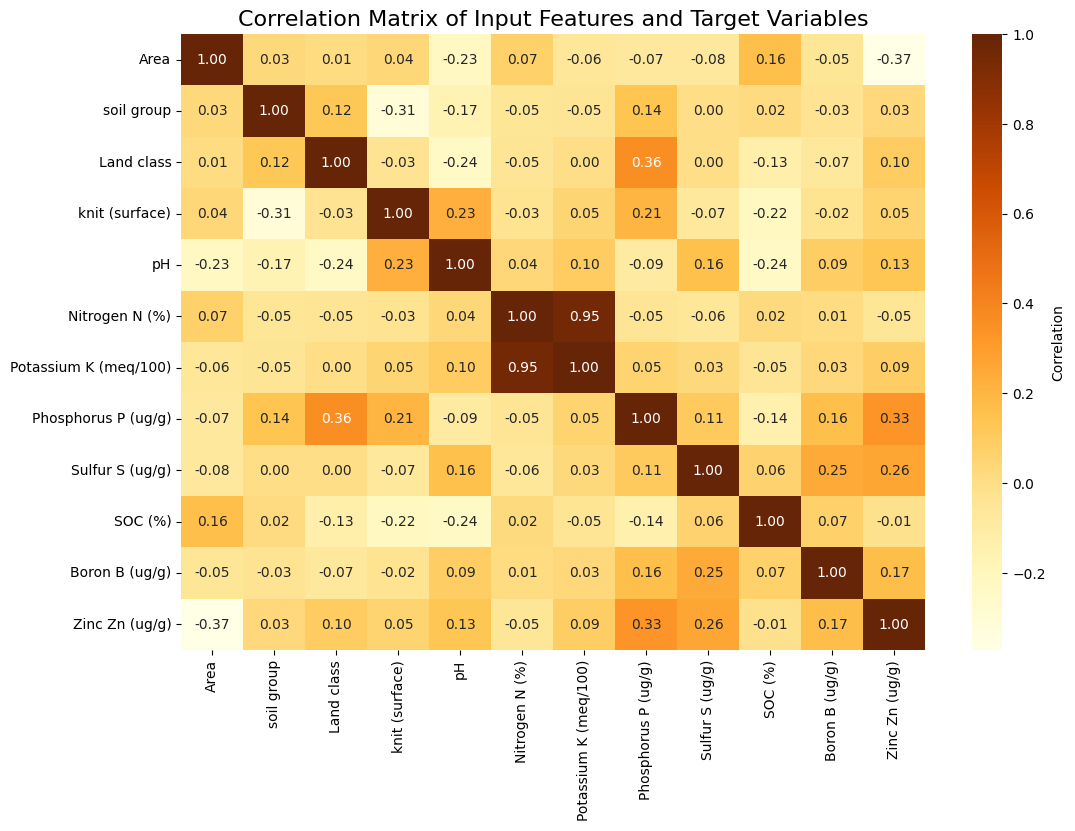

In [9]:
correlation_matrix = iPAGE[X + Y].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlOrBr", fmt=".2f", cbar_kws={'label': 'Correlation'})
plt.title("Correlation Matrix of Input Features and Target Variables", fontsize=16)
plt.show()

# Step 7: Define Function to Run TPOT for AutoML on Each Target Variable

Create a function that trains a TPOT AutoML model on each target variable, evaluates its performance, and displays relevant plots.

In [10]:
tpot_results = {}

def run_tpot_for_target(X_data, y_data, target_label):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
    
    # Initialize TPOT
    tpot = TPOTRegressor(verbosity=2, generations=5, population_size=50, random_state=42, config_dict="TPOT sparse")
    tpot.fit(X_train, y_train)

    # Make predictions
    y_pred = tpot.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Print results
    print(f"\nPerformance for {target_label}:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R² Score: {r2}")

    # Store results with cleaned filename
    clean_target_label = target_label.replace(" ", "_").replace("(", "").replace(")", "").replace("%", "").replace("/", "_")
    tpot_results[clean_target_label] = {
        'pipeline': tpot.fitted_pipeline_,
        'mean_absolute_error': mae,
        'root_mean_squared_error': rmse,
        'r2_score': r2
    }
    tpot.export(f"tpot_{clean_target_label}_pipeline.py")
    
    # Plot Predictions vs Actual values
    plt.figure(figsize=(12, 5))

    # Scatter plot of actual vs predicted values
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_test, y=y_pred, color="#8B4513", edgecolor="black")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{target_label} - Predicted vs Actual")

    # Residual plot
    residuals = y_test - y_pred
    plt.subplot(1, 2, 2)
    sns.histplot(residuals, kde=True, color="#8B4513")
    plt.xlabel("Residuals")
    plt.title(f"{target_label} - Residuals Distribution")

    plt.suptitle(f"Performance Visualization for {target_label}", fontsize=16)
    plt.tight_layout()
    plt.show()

# Step 8: Run TPOT for Each Target Variable

Run the run_tpot_for_target function on each target variable: SOC (%), Boron B (ug/g), and Zinc Zn (ug/g).

Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.18628370170146866

Generation 2 - Current best internal CV score: -0.18628370170146866

Generation 3 - Current best internal CV score: -0.18561054966305093

Generation 4 - Current best internal CV score: -0.18561054966305093

Generation 5 - Current best internal CV score: -0.18049338597021886

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=100)

Performance for SOC (%):
Mean Absolute Error (MAE): 0.41906444639075074
Root Mean Squared Error (RMSE): 1.7126049574848352
R² Score: 0.09207153440634852


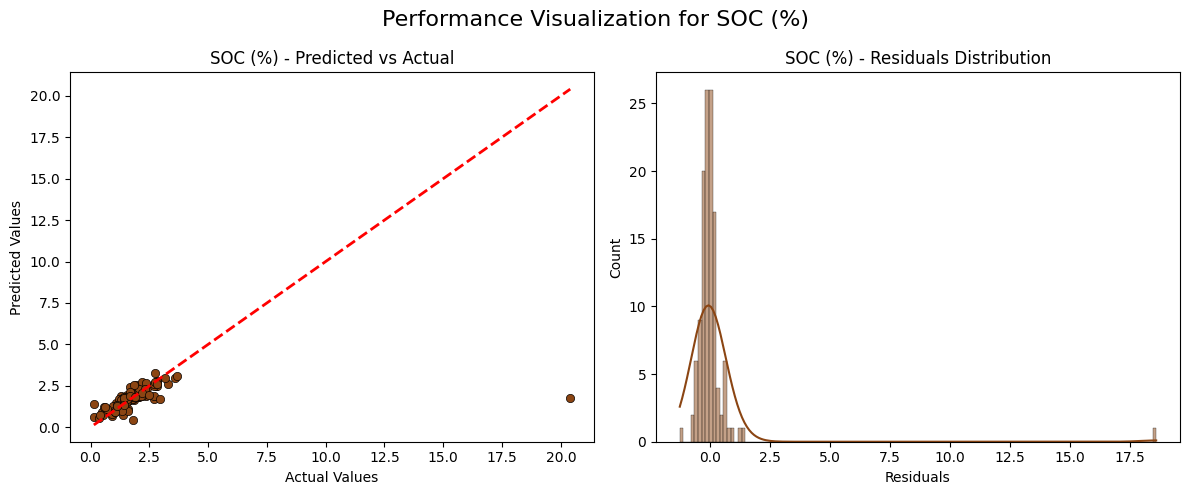

Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.05234336522680888

Generation 2 - Current best internal CV score: -0.05234336522680888

Generation 3 - Current best internal CV score: -0.052050701054883894

Generation 4 - Current best internal CV score: -0.05172661050223927

Generation 5 - Current best internal CV score: -0.050044649095687586

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.8500000000000001, verbosity=0)

Performance for Boron B (ug/g):
Mean Absolute Error (MAE): 0.13512074828989085
Root Mean Squared Error (RMSE): 0.22521147302127728
R² Score: 0.06833025463492481


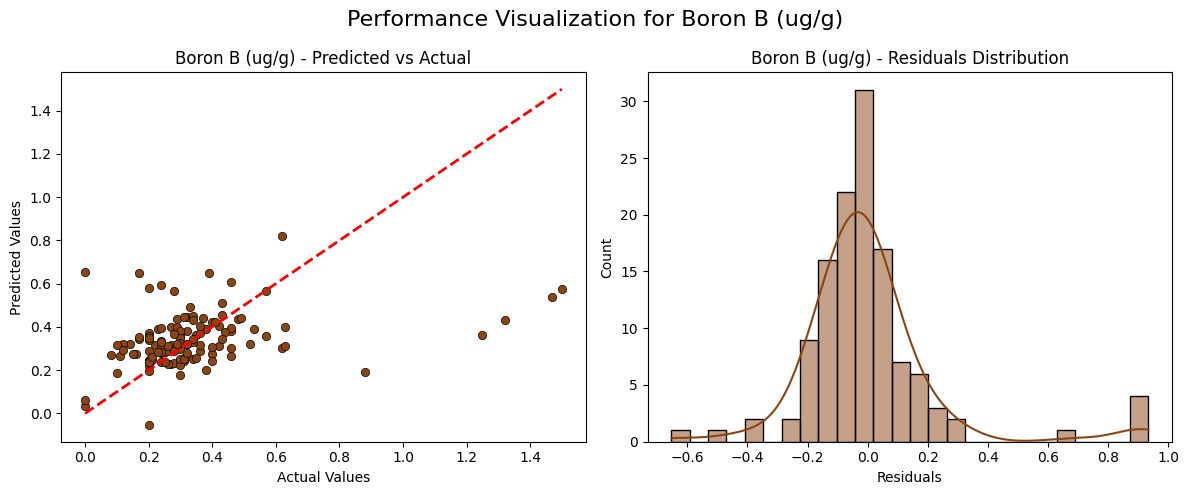

Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.5396199509885273

Generation 2 - Current best internal CV score: -0.5396199509885273

Generation 3 - Current best internal CV score: -0.5396199509885273

Generation 4 - Current best internal CV score: -0.5396199509885273

Generation 5 - Current best internal CV score: -0.5353858952739006

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=100)

Performance for Zinc Zn (ug/g):
Mean Absolute Error (MAE): 0.35163208086222975
Root Mean Squared Error (RMSE): 0.5936492036961116
R² Score: 0.32220990209070166


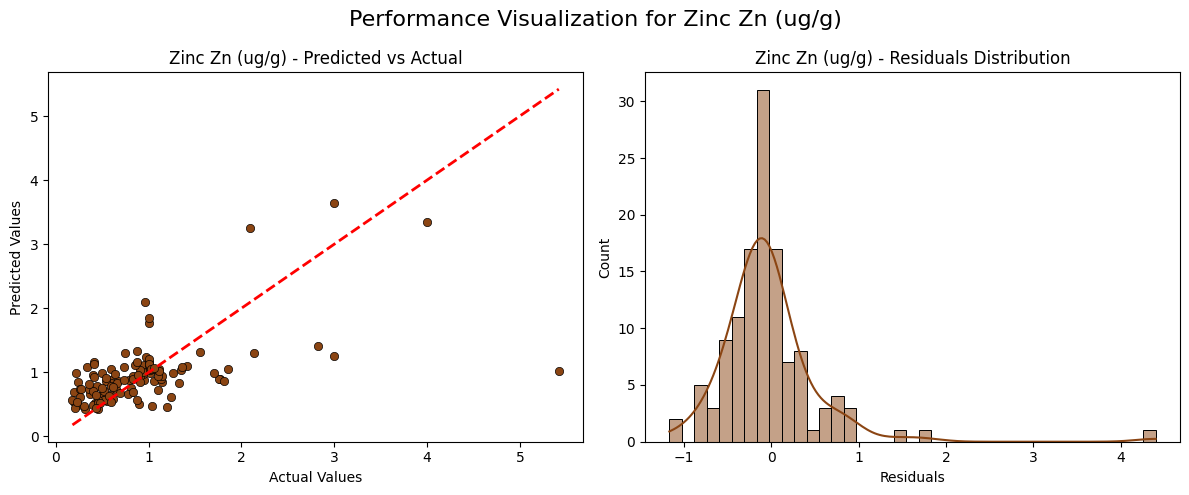

In [11]:
run_tpot_for_target(iPAGE[X], y_SOC, "SOC (%)")
run_tpot_for_target(iPAGE[X], y_B, "Boron B (ug/g)")
run_tpot_for_target(iPAGE[X], y_Zn, "Zinc Zn (ug/g)")

# Step 9: Summary of Results

Execute a summary of the performance metrics for each target variable.

In [12]:
print("\nSummary of TPOT Model Performance:")
for target, metrics in tpot_results.items():
    print(f"\n{target} - MAE: {metrics['mean_absolute_error']}, RMSE: {metrics['root_mean_squared_error']}, R²: {metrics['r2_score']}")


Summary of TPOT Model Performance:

SOC_ - MAE: 0.41906444639075074, RMSE: 1.7126049574848352, R²: 0.09207153440634852

Boron_B_ug_g - MAE: 0.13512074828989085, RMSE: 0.22521147302127728, R²: 0.06833025463492481

Zinc_Zn_ug_g - MAE: 0.35163208086222975, RMSE: 0.5936492036961116, R²: 0.32220990209070166
